## Classificação de variáveis

### Importando as bibliotecas 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from slugify import slugify
from sklearn.model_selection import train_test_split
import Levenshtein
#from iowalicor.data.preprocessing import slugify
#from application.app.folder.file import func_name

In [54]:
df_firstn = pd.read_csv("../data/raw/iowa_liquor_train_test_split_sample.csv", nrows=10)
df_firstn

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2364808,S10798700028,02/26/2013,4347,Jeff's Market / Blue Grass,102 W MAYNE,BLUE GRASS,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155,Wild Turkey 101 Round,12,375,$6.00,$8.99,1,$8.99,0.38,0.10
1,12139684,INV-06802100005,08/22/2017,3651,Wal-Mart 1491 / Indianola,1500 North Jefferson,Indianola,50125,1500 North Jefferson\nIndianola 50125\n,91.0,...,11298,Crown Royal Canadian Whisky,6,1750,$31.99,$47.99,1,$287.94,1.75,0.46
2,31671,S14182900098,08/28/2013,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N LAKE ST,STORM LAKE,50588,"1250 N LAKE ST\nSTORM LAKE 50588\n(42.653594, ...",11.0,...,86688,Firefly Strawberry Moonshine,12,750,$9.88,$14.82,2,$29.64,1.50,0.40
3,1100266,S11292900026,03/26/2013,3756,Main Street Liquors / Manning,316 MAIN ST,MANNING,51455,"316 MAIN ST\nMANNING 51455\n(41.908573, -95.06...",14.0,...,69947,Rumple Minze Peppermint Schnapps Liqueur,12,1000,$15.15,$22.72,1,$22.72,1.00,0.26
4,12120532,INV-06737700004,08/17/2017,4997,Downtown Pantry,"218, 6th Ave #101",Des Moines,50309,"218, 6th Ave #101\nDes Moines 50309\n(41.58568...",77.0,...,89191,Jose Cuervo Especial Reposado Tequila Mini,12,500,$11.50,$17.25,1,$17.25,0.50,0.13
5,11670503,INV-05415200028,06/08/2017,2595,Hy-Vee Wine and Spirits / Denison,"1620 4th Ave, South",Denison,51442,"1620 4th Ave, South\nDenison 51442\n(42.012395...",24.0,...,10828,Crown Royal Northern Harvest Rye,12,750,$17.50,$26.25,2,$26.25,1.50,0.39
6,4543410,S11437200032,04/03/2013,3712,Monte Spirits,109 N 4TH ST,MONTEZUMA,50171,"109 N 4TH ST\nMONTEZUMA 50171\n(41.585429, -92...",79.0,...,77776,Wild Turkey American Honey,12,750,$10.50,$15.75,2,$31.50,1.50,0.40
7,8212094,S29576500047,12/10/2015,2671,Hy-Vee / Jefferson,"106, W WASHINGTON ST",JEFFERSON,50129,"106, W WASHINGTON ST\nJEFFERSON 50129\n(42.017...",37.0,...,10807,Crown Royal Regal Apple,12,750,$15.00,$22.50,60,$1350.00,45.00,11.89
8,1665619,S20509100146,08/06/2014,3495,Great Pastimes,228 N MAIN ST,MONTICELLO,52310,"228 N MAIN ST\nMONTICELLO 52310\n(42.240132, -...",53.0,...,89194,Jose Cuervo Especial Reposado Flask,24,375,$5.50,$8.25,3,$24.75,1.12,0.30
9,1800759,S10087900002,01/16/2013,2535,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265,1700 VALLEY WEST DR\nWEST DES MOINES 50265\n,77.0,...,27290,Iowa Shine,12,375,$10.08,$15.13,12,$181.56,4.50,1.19


In [55]:
df_firstn['Volume Sold (Gallons)'].head(20)

0     0.10
1     0.46
2     0.40
3     0.26
4     0.13
5     0.39
6     0.40
7    11.89
8     0.30
9     1.19
Name: Volume Sold (Gallons), dtype: float64

## Análise exploratória dataset Iowa_Liquor_Sales

In [56]:
#req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Lendo o dataset e atribuindo a uma variável

In [57]:
#dataset = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", usecols=req_cols)
df = pd.read_csv("../data/raw/iowa_liquor_train_test_split_sample.csv",parse_dates=['Date'],dtype={
    'Invoice/Item Number': str,
    'Store Number': float,
    'Store Name': str,
    'Address': str,
    'City': str,
    'Zip Code': str,
    'Store Location': str,
    'County Number': float,
    'County': str,
    'Category': float,
    'Category Name': str,
    'Vendor Number': float,
    'Vendor Name': str,
    'Item Number': float,
    'Item Description': str,
    'Pack': float,
    'Bottle Volume (ml)': int,
    'State Bottle Cost': str,
    'State Bottle Retail': str,
    'Bottles Sold': int,
    'Sale (Dollars)': str,
    'Volume Sold (Liters)': float,
    'Volume Sold (Gallons)': float
})

In [58]:
df.head()

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2364808,S10798700028,2013-02-26,4347.0,Jeff's Market / Blue Grass,102 W MAYNE,BLUE GRASS,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155.0,Wild Turkey 101 Round,12.0,375,$6.00,$8.99,1,$8.99,0.38,0.10
1,12139684,INV-06802100005,2017-08-22,3651.0,Wal-Mart 1491 / Indianola,1500 North Jefferson,Indianola,50125,1500 North Jefferson\nIndianola 50125\n,91.0,...,11298.0,Crown Royal Canadian Whisky,6.0,1750,$31.99,$47.99,1,$287.94,1.75,0.46
2,31671,S14182900098,2013-08-28,2576.0,Hy-Vee Wine and Spirits / Storm Lake,1250 N LAKE ST,STORM LAKE,50588,"1250 N LAKE ST\nSTORM LAKE 50588\n(42.653594, ...",11.0,...,86688.0,Firefly Strawberry Moonshine,12.0,750,$9.88,$14.82,2,$29.64,1.50,0.40
3,1100266,S11292900026,2013-03-26,3756.0,Main Street Liquors / Manning,316 MAIN ST,MANNING,51455,"316 MAIN ST\nMANNING 51455\n(41.908573, -95.06...",14.0,...,69947.0,Rumple Minze Peppermint Schnapps Liqueur,12.0,1000,$15.15,$22.72,1,$22.72,1.00,0.26
4,12120532,INV-06737700004,2017-08-17,4997.0,Downtown Pantry,"218, 6th Ave #101",Des Moines,50309,"218, 6th Ave #101\nDes Moines 50309\n(41.58568...",77.0,...,89191.0,Jose Cuervo Especial Reposado Tequila Mini,12.0,500,$11.50,$17.25,1,$17.25,0.50,0.13


### Utilizando o train_test_split para dividir o dataset em dados

In [59]:
#X = dataset
#y = dataset

In [60]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [61]:
#df = pd.DataFrame(X_test)
#df.head()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518216 entries, 0 to 2518215
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   Invoice/Item Number    object        
 2   Date                   datetime64[ns]
 3   Store Number           float64       
 4   Store Name             object        
 5   Address                object        
 6   City                   object        
 7   Zip Code               object        
 8   Store Location         object        
 9   County Number          float64       
 10  County                 object        
 11  Category               float64       
 12  Category Name          object        
 13  Vendor Number          float64       
 14  Vendor Name            object        
 15  Item Number            float64       
 16  Item Description       object        
 17  Pack                   float64       
 18  Bottle Volume (ml)    

In [63]:
#df.to_csv('iowa_liquor_train_test_split_sample.csv')

In [64]:
df.columns = [slugify(col, lowercase=True, separator='_') for col in df.columns]
df.columns

Index(['unnamed_0', 'invoice_item_number', 'date', 'store_number',
       'store_name', 'address', 'city', 'zip_code', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [65]:
#df['city'] = slugify(str(df['city']))

### Substituindo os valores NaN da tabela para diminuir o tamanho do dataset

In [66]:
df.isnull().values.any()

True

In [67]:
for x in df.columns:
    df[x] = df[x].fillna('0')

In [68]:
df.isnull().values.any()

False

#### Verificando quantidade de cidades e condados:

In [69]:
cities = df['city'].unique().astype(str)

In [70]:
cities

array(['BLUE GRASS', 'Indianola', 'STORM LAKE', 'MANNING', 'Des Moines',
       'Denison', 'MONTEZUMA', 'JEFFERSON', 'MONTICELLO',
       'WEST DES MOINES', 'Tripoli', 'DES MOINES', 'HARLAN', 'Fort Dodge',
       'Waterloo', 'WILTON', 'GRIMES', 'CEDAR RAPIDS', 'ANKENY',
       'Webster City', 'Davenport', 'COUNCIL BLUFFS', 'DAVENPORT',
       'CRESCO', 'Pella', 'SLATER', 'FORT MADISON', 'FORT DODGE',
       'CEDAR FALLS', 'MT VERNON', 'WASHINGTON', 'SHENANDOAH',
       'Iowa City', 'Johnston', 'SIOUX CITY', 'WAVERLY', 'Grinnell',
       'MOUNT AYR', 'HUMBOLDT', 'Elma', 'ONAWA', 'MASON CITY',
       'IOWA CITY', 'DYERSVILLE', 'GOWRIE', 'CRESTON', 'Arnolds Park',
       'Marion', 'MISSOURI VALLEY', 'CAMANCHE', 'CLIVE', 'CLINTON',
       'La Porte City', 'Mason City', 'FOREST CITY', 'EMMETSBURG',
       'BETTENDORF', 'DUBUQUE', 'IOWA FALLS', 'Red Oak', 'WATERLOO',
       'AMES', 'ALTOONA', 'MARSHALLTOWN', 'STUART', 'GRINNELL', 'JEWELL',
       'MARION', 'MOUNT PLEASANT', 'SIOUX CENTER', '

In [71]:
df['city'] = df['city'].apply(slugify)

In [72]:
cities_slg = df['city'].unique().astype(str)

In [73]:
#def distance(s1,s2):
    #if Levenshtein.distance(s1,s2) != 0:
        #return s1

In [74]:
sorted(cities_slg)

['0',
 'ackley',
 'adair',
 'adel',
 'afton',
 'akron',
 'albert-city',
 'albia',
 'albion',
 'alburnett',
 'alden',
 'algona',
 'allison',
 'alta',
 'alta-vista',
 'alton',
 'altoona',
 'alvord',
 'amana',
 'ames',
 'anamosa',
 'anita',
 'ankeny',
 'anthon',
 'arlington',
 'armstrong',
 'arnold-s-park',
 'arnolds-park',
 'atkins',
 'atlantic',
 'audubon',
 'aurelia',
 'avoca',
 'baldwin',
 'bancroft',
 'baxter',
 'bedford',
 'belle-plaine',
 'bellevue',
 'belmond',
 'bettendorf',
 'bevington',
 'bloomfield',
 'blue-grass',
 'bondurant',
 'boone',
 'britt',
 'brooklyn',
 'buffalo',
 'buffalo-center',
 'burlington',
 'bussey',
 'camanche',
 'cambridge',
 'carlisle',
 'carroll',
 'carter-lake',
 'cascade',
 'casey',
 'cedar-falls',
 'cedar-rapids',
 'center-point',
 'centerville',
 'central-city',
 'chariton',
 'charles-city',
 'cherokee',
 'chester',
 'clarinda',
 'clarion',
 'clarksville',
 'clear-lake',
 'clearlake',
 'clinton',
 'clive',
 'colesburg',
 'colfax',
 'colo',
 'columbus-j

In [75]:
df[df['city'] == 'arnold-s-park'] = 'arnolds-park'

In [76]:
df[df['city']=='clearlake']='clear-lake'

In [77]:
df[df['city']=='grand-mounds'] = 'grand-mound'

In [78]:
df[df['city']=='guttenburg']='guttenberg'

In [79]:
df[df['city']=='kellog']='kellogg'

In [80]:
df[df['city']=='ottuwma' ]='ottumwa'
df[df['city']=='otumwa']='ottumwa'

In [81]:
cities_clean = df['city'].unique().astype(str)

In [82]:
sorted(cities_clean)

['0',
 'ackley',
 'adair',
 'adel',
 'afton',
 'akron',
 'albert-city',
 'albia',
 'albion',
 'alburnett',
 'alden',
 'algona',
 'allison',
 'alta',
 'alta-vista',
 'alton',
 'altoona',
 'alvord',
 'amana',
 'ames',
 'anamosa',
 'anita',
 'ankeny',
 'anthon',
 'arlington',
 'armstrong',
 'arnolds-park',
 'atkins',
 'atlantic',
 'audubon',
 'aurelia',
 'avoca',
 'baldwin',
 'bancroft',
 'baxter',
 'bedford',
 'belle-plaine',
 'bellevue',
 'belmond',
 'bettendorf',
 'bevington',
 'bloomfield',
 'blue-grass',
 'bondurant',
 'boone',
 'britt',
 'brooklyn',
 'buffalo',
 'buffalo-center',
 'burlington',
 'bussey',
 'camanche',
 'cambridge',
 'carlisle',
 'carroll',
 'carter-lake',
 'cascade',
 'casey',
 'cedar-falls',
 'cedar-rapids',
 'center-point',
 'centerville',
 'central-city',
 'chariton',
 'charles-city',
 'cherokee',
 'chester',
 'clarinda',
 'clarion',
 'clarksville',
 'clear-lake',
 'clinton',
 'clive',
 'colesburg',
 'colfax',
 'colo',
 'columbus-junction',
 'conrad',
 'coon-rapi

In [83]:
len(cities)

794

In [84]:
counties = df['county'].unique().astype(str)

In [85]:
counties

array(['Scott', 'WARREN', 'Buena Vista', 'Carroll', 'POLK', 'CRAWFORD',
       'Poweshiek', 'Greene', 'Jones', 'Polk', 'Bremer', 'Shelby',
       'WEBSTER', 'BLACK HAWK', 'Muscatine', 'Linn', 'HAMILTON', 'SCOTT',
       'Pottawattamie', 'Howard', 'MARION', 'Story', 'Lee', 'Webster',
       'Black Hawk', 'Washington', 'Page', 'Johnson', 'Woodbury',
       'POWESHIEK', 'Ringgold', 'Humboldt', 'JOHNSON', 'Monona',
       'Cerro Gordo', 'Dubuque', 'Union', 'DICKINSON', 'Harrison',
       'Clinton', 'CERRO GORD', 'Winnebago', 'Palo Alto', 'Hardin',
       'MONTGOMERY', 'Marshall', 'Adair', 'Hamilton', 'Henry', 'Sioux',
       'Des Moines', 'Mahaska', '0', 'Plymouth', 'Clayton', 'Dallas',
       'BOONE', 'Appanoose', 'Mitchell', 'LINN', 'Montgomery', 'Jackson',
       'WINNEBAGO', 'POTTAWATTA', 'Cass', 'Decatur', 'Jasper', 'Clay',
       'Buchanan', 'Winneshiek', 'Delaware', 'Tama', 'UNION', 'Dickinson',
       'Sac', 'Boone', 'Lyon', 'Cherokee', 'Kossuth', 'WOODBURY', 'Cedar',
       'Warre

In [86]:
len(counties)

207

In [87]:
df['county'] = df['county'].apply(slugify)

In [88]:
df.head()

,unnamed_0,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2364808,S10798700028,2013-02-26 00:00:00,4347.0,Jeff's Market / Blue Grass,102 W MAYNE,blue-grass,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155.0,Wild Turkey 101 Round,12.0,375,$6.00,$8.99,1,$8.99,0.38,0.1
1,12139684,INV-06802100005,2017-08-22 00:00:00,3651.0,Wal-Mart 1491 / Indianola,1500 North Jefferson,indianola,50125,1500 North Jefferson\nIndianola 50125\n,91.0,...,11298.0,Crown Royal Canadian Whisky,6.0,1750,$31.99,$47.99,1,$287.94,1.75,0.46
2,31671,S14182900098,2013-08-28 00:00:00,2576.0,Hy-Vee Wine and Spirits / Storm Lake,1250 N LAKE ST,storm-lake,50588,"1250 N LAKE ST\nSTORM LAKE 50588\n(42.653594, ...",11.0,...,86688.0,Firefly Strawberry Moonshine,12.0,750,$9.88,$14.82,2,$29.64,1.5,0.4
3,1100266,S11292900026,2013-03-26 00:00:00,3756.0,Main Street Liquors / Manning,316 MAIN ST,manning,51455,"316 MAIN ST\nMANNING 51455\n(41.908573, -95.06...",14.0,...,69947.0,Rumple Minze Peppermint Schnapps Liqueur,12.0,1000,$15.15,$22.72,1,$22.72,1.0,0.26
4,12120532,INV-06737700004,2017-08-17 00:00:00,4997.0,Downtown Pantry,"218, 6th Ave #101",des-moines,50309,"218, 6th Ave #101\nDes Moines 50309\n(41.58568...",77.0,...,89191.0,Jose Cuervo Especial Reposado Tequila Mini,12.0,500,$11.50,$17.25,1,$17.25,0.5,0.13


In [89]:
counties2 = df['county'].unique().astype(str)

In [90]:
sorted(counties2)

['0',
 'adair',
 'adams',
 'allamakee',
 'appanoose',
 'arnolds-park',
 'audubon',
 'benton',
 'black-hawk',
 'boone',
 'bremer',
 'buchanan',
 'buena-vist',
 'buena-vista',
 'butler',
 'calhoun',
 'carroll',
 'cass',
 'cedar',
 'cerro-gord',
 'cerro-gordo',
 'cherokee',
 'chickasaw',
 'clarke',
 'clay',
 'clayton',
 'clear-lake',
 'clinton',
 'crawford',
 'dallas',
 'davis',
 'decatur',
 'delaware',
 'des-moines',
 'dickinson',
 'dubuque',
 'emmet',
 'fayette',
 'floyd',
 'franklin',
 'fremont',
 'grand-mound',
 'greene',
 'grundy',
 'guthrie',
 'guttenberg',
 'hamilton',
 'hancock',
 'hardin',
 'harrison',
 'henry',
 'howard',
 'humboldt',
 'ida',
 'iowa',
 'jackson',
 'jasper',
 'jefferson',
 'johnson',
 'jones',
 'kellogg',
 'keokuk',
 'kossuth',
 'lee',
 'linn',
 'louisa',
 'lucas',
 'lyon',
 'madison',
 'mahaska',
 'marion',
 'marshall',
 'mills',
 'mitchell',
 'monona',
 'monroe',
 'montgomery',
 'muscatine',
 'o-brien',
 'obrien',
 'osceola',
 'ottumwa',
 'page',
 'palo-alto',


In [91]:
df[df['county'] == "cerro-gord"] = "cerro-gordo"

In [92]:
description = df['item_description'].unique()

In [93]:
df['item_description'] = df['item_description'].apply(slugify)

### Parece que precisaremos realizar algum tipo de transformação nesses dados. Pode-se perceber que às vezes o nome da cidade ou condado aparece com nome maiúsculo e às vezes minusculo. por via das dúvidas iremos fazer isso com a descrição do item também. Isso influencia de alguma forma nossa análise.

### Temos também um problema com os condados de O'BRIEN e CERRO GORDO, pois algumas vezes ele aparece com ou sem a aspa simples

### Qual condado "OBRIEN" tem mais entradas? OBRIEN ou O'BRIEN?:

### Vamos retirar os cifrões do preço de custo e do preço de venda para facilitar futuras operações com esses números :

In [94]:
df['state_bottle_cost'] = df['state_bottle_cost'].replace({'\$':''}, regex = True)

In [95]:
df['state_bottle_retail'] = df['state_bottle_retail'].replace({'\$':''}, regex = True)

## Explorando o dataset:

#### Verificando formato dos dados:

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518216 entries, 0 to 2518215
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   unnamed_0            object
 1   invoice_item_number  object
 2   date                 object
 3   store_number         object
 4   store_name           object
 5   address              object
 6   city                 object
 7   zip_code             object
 8   store_location       object
 9   county_number        object
 10  county               object
 11  category             object
 12  category_name        object
 13  vendor_number        object
 14  vendor_name          object
 15  item_number          object
 16  item_description     object
 17  pack                 object
 18  bottle_volume_ml     object
 19  state_bottle_cost    object
 20  state_bottle_retail  object
 21  bottles_sold         object
 22  sale_dollars         object
 23  volume_sold_liters   object
 24  volume_sold_gallons  obj

#### Usando float16 para economizar memoria(float16 = máximo 32767):

In [97]:
df['volume_sold_liters'] = np.float16(df['volume_sold_liters'])

ValueError: could not convert string to float: 'cerro-gordo'

#### Transformando o os dados da coluna Date em formato datetime

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518216 entries, 0 to 2518215
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   unnamed_0            object
 1   invoice_item_number  object
 2   date                 object
 3   store_number         object
 4   store_name           object
 5   address              object
 6   city                 object
 7   zip_code             object
 8   store_location       object
 9   county_number        object
 10  county               object
 11  category             object
 12  category_name        object
 13  vendor_number        object
 14  vendor_name          object
 15  item_number          object
 16  item_description     object
 17  pack                 object
 18  bottle_volume_ml     object
 19  state_bottle_cost    object
 20  state_bottle_retail  object
 21  bottles_sold         object
 22  sale_dollars         object
 23  volume_sold_liters   object
 24  volume_sold_gallons  obj

In [99]:
df.tail(1)

,unnamed_0,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
2518215,9597741,S33343700041,2016-07-12 00:00:00,2629.0,Hy-Vee Food Store #2 / Council Bluff,1745 Madison Ave,council-bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,...,41857.0,uv-cherry-red-vodka-mini,6.0,500,4.89,7.34,4,$29.36,2.0,0.53


In [100]:
df.head(1)

,unnamed_0,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2364808,S10798700028,2013-02-26 00:00:00,4347.0,Jeff's Market / Blue Grass,102 W MAYNE,blue-grass,52726,"102 W MAYNE\nBLUE GRASS 52726\n(41.509114, -90...",82.0,...,22155.0,wild-turkey-101-round,12.0,375,6.00,8.99,1,$8.99,0.38,0.1


In [101]:
df.tail(1)

,unnamed_0,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
2518215,9597741,S33343700041,2016-07-12 00:00:00,2629.0,Hy-Vee Food Store #2 / Council Bluff,1745 Madison Ave,council-bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,...,41857.0,uv-cherry-red-vodka-mini,6.0,500,4.89,7.34,4,$29.36,2.0,0.53


### Em qual condado se vendeu mais?

<AxesSubplot:>

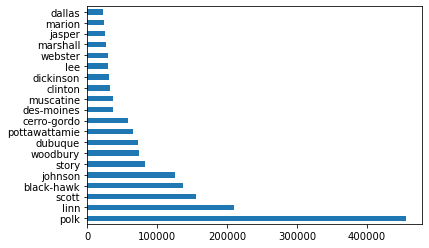

In [102]:
county_sales = df['county'].value_counts().nlargest(20)
county_sales.plot(kind="barh")

### Sabendo que o condado de POLK foi o que vendeu mais, quais cidades do condado de POLK venderam mais?

#### Filtrando as cidades do condado de POLK

In [103]:
polk = df[df['county']=='polk']
polk.head()

,unnamed_0,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
4,12120532,INV-06737700004,2017-08-17 00:00:00,4997.0,Downtown Pantry,"218, 6th Ave #101",des-moines,50309,"218, 6th Ave #101\nDes Moines 50309\n(41.58568...",77.0,...,89191.0,jose-cuervo-especial-reposado-tequila-mini,12.0,500,11.50,17.25,1,$17.25,0.5,0.13
9,1800759,S10087900002,2013-01-16 00:00:00,2535.0,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR,west-des-moines,50265,1700 VALLEY WEST DR\nWEST DES MOINES 50265\n,77.0,...,27290.0,iowa-shine,12.0,375,10.08,15.13,12,$181.56,4.5,1.19
11,7187077,S25398500084,2015-04-30 00:00:00,2561.0,Hy-Vee Food Store / Fleur / DSM,4605 FLEUR DRIVE,des-moines,50321,4605 FLEUR DRIVE\nDES MOINES 50321\n(41.542816...,77.0,...,34052.0,absolut-raspberri,12.0,750,11.49,17.24,1,$17.24,0.75,0.2
16,7014204,S21300000106,2014-09-18 00:00:00,4829.0,Central City 2,1501 MICHIGAN AVE,des-moines,50314,1501 MICHIGAN AVE\nDES MOINES 50314\n(41.60556...,77.0,...,86112.0,dekuyper-triple-sec,12.0,1000,2.22,3.33,12,$39.96,12.0,3.17
17,4478014,S12448100039,2013-05-28 00:00:00,4209.0,Wal-Mart 5748 / Grimes,2150 EAST 1ST ST,grimes,50111,"2150 EAST 1ST ST\nGRIMES 50111\n(41.688335, -9...",77.0,...,88296.0,patron-tequila-silver,12.0,750,27.00,40.50,12,$486.00,9.0,2.38


#### Quais cidades há no condado de POLK?

In [104]:
polk['city'].unique()

array(['des-moines', 'west-des-moines', 'grimes', 'ankeny', 'johnston',
       'clive', 'altoona', 'windsor-heights', 'pleasant-hill',
       'urbandale', 'polk-city', 'bondurant', 'cambridge', 'swisher',
       'runnells', 'mitchellville'], dtype=object)

#### Em quais cidade do condado de POLK se vendeu mais bebida?

<AxesSubplot:>

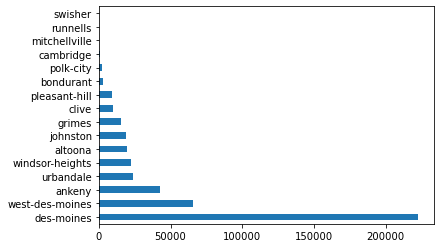

In [105]:
polk['city'].value_counts().plot(kind="barh")

#### Quais cidades no estado do IOWA venderam mais bebida?

<AxesSubplot:>

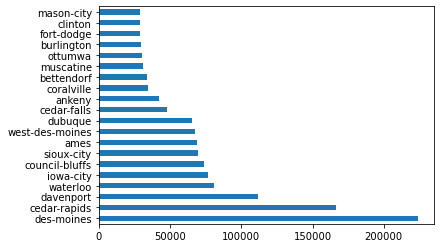

In [106]:
city_sales = df['city'].value_counts().nlargest(20)
city_sales.plot(kind="barh")

#### Filtrando os dados por ano

In [107]:
year_2012 = df[df['date'].dt.year == 2012]
year_2012.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [111]:
year_2013 = df[df['date'].dt.year == 2013]
year_2013.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
year_2014 = df[df['date'].dt.year == 2014]
year_2014.head()

In [ ]:
year_2015 = df[df['date'].dt.year == 2015]
year_2015.head()

In [ ]:
year_2016 = df[df['date'].dt.year == 2016]
year_2016.head()

In [ ]:
year_2017 = df[df['date'].dt.year == 2017]
year_2017.head()

In [ ]:
year1 = [2012,2013,2014,2015,2016,2017]
qtt1 = []
qtt1.append(len(year_2012.index))
qtt1.append(len(year_2013.index))
qtt1.append(len(year_2014.index))
qtt1.append(len(year_2015.index))
qtt1.append(len(year_2016.index))
qtt1.append(len(year_2017.index))
qtt1

In [ ]:
plt.grid(True)
plt.plot(year1, qtt1)

In [108]:
year2 = [2012,2013,2014,2015,2016]
qtt2 = []
qtt2.append(len(year_2012.index))
qtt2.append(len(year_2013.index))
qtt2.append(len(year_2014.index))
qtt2.append(len(year_2015.index))
qtt2.append(len(year_2016.index))
qtt2

NameError: name 'year_2012' is not defined

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

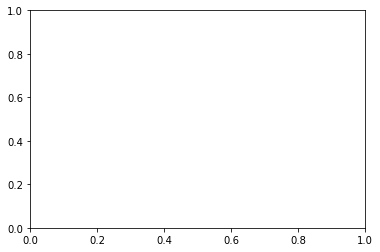

In [109]:
plt.plot(year2, qtt2)
plt.show()

In [110]:
volume_per_month_2012 = year_2012['date']

NameError: name 'year_2012' is not defined

In [ ]:
volume_per_month_2013 = year_2013['date']

In [ ]:
volume_per_month_2014 = year_2014['date']

In [ ]:
volume_per_month_2015 = year_2015['date']

In [ ]:
volume_per_month_2016 = year_2016['date']

In [ ]:
volume_per_month_2017 = year_2017['date']

In [ ]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().plot(label="2012")
plt.legend()

In [ ]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().max()

In [ ]:
volume_per_month_2013.groupby(volume_per_month_2013.dt.month).count().plot(label="2013")
plt.legend()

In [ ]:
volume_per_month_2014.groupby(volume_per_month_2014.dt.month).count().plot(label="2014")
plt.legend()

In [ ]:
volume_per_month_2015.groupby(volume_per_month_2015.dt.month).count().plot(label="2015")
plt.legend()

In [ ]:
volume_per_month_2016.groupby(volume_per_month_2016.dt.month).count().plot(label="2016")
plt.legend()

In [ ]:
volume_per_month_2017.groupby(volume_per_month_2017.dt.month).count().plot(label="2017")
plt.legend()